### Pre-Trained embedding을 사용하지 않고 같은 모델 훌련하기

In [1]:
# 원본 데이터 다운로드
import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']: # negative, positive divide
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

- 추후 pre-trained model을 사용할것이기 때문에(데이터수가 적을때 유용한 pre-trained model이라는점)
- 데이터를 200개로 제한한다.

In [2]:
len(texts), len(labels)

(25000, 25000)

In [3]:
# tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버린다.
training_samples = 200
validation_samples = 10000 # 검증 데이터는 1만개~
max_words = 10000 # 가장 빈도가 높은 단어 1만개만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # text를 integer의 sequence로 만들어줘!

word_index = tokenizer.word_index
print("%s개의 고유 토큰을 발견하였습니다." % len(word_index))

data = pad_sequences(sequences=sequences, maxlen=maxlen)
labels = np.asarray(labels)
print("데이터 텐서의 크기 : ", data.shape)
print("레이블 텐서의 크기 : ", labels.shape)

indices = np.arange(data.shape[0]) 
np.random.shuffle(indices) # 부정 끝나면 긍정나오기 때문에 섞어준다.
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]

y_train = labels[:training_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Using TensorFlow backend.


88582개의 고유 토큰을 발견하였습니다.
데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 크기 :  (25000,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6961 - acc: 0.4500 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.5050 - acc: 0.9900 - val_loss: 0.6973 - val_acc: 0.5103
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.2845 - acc: 0.9900 - val_loss: 0.7142 - val_acc: 0.5145
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1231 - acc: 1.0000 - val_loss: 0.7037 - val_acc: 0.5233
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0565 - acc: 1.0000 - val_loss: 0.7093 - val_acc: 0.5210
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0291 - acc: 1.0000 - val_loss: 0.7163 - val_acc: 0.5260
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.7236 - val_acc: 0.5234
Epoch 8/10
200/200 [=

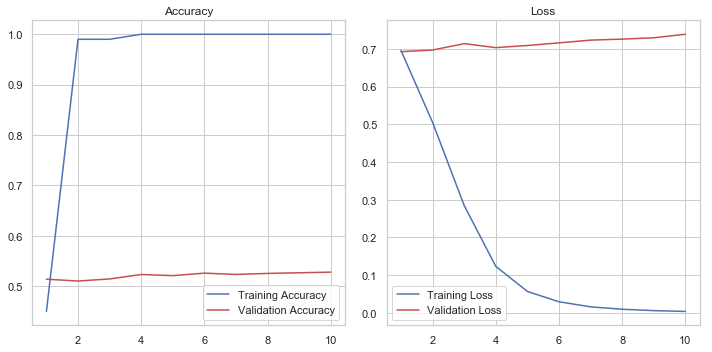

In [7]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist.history['acc']) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, hist.history['acc'], 'b-', label='Training Accuracy')
plt.plot(epochs, hist.history['val_acc'], 'r-', label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hist.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, hist.history['val_loss'], 'r-', label='Validation Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

---
### training data 갯수를 늘려보자
- 2000개

In [10]:
# tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버린다.
training_samples = 2000
validation_samples = 10000 # 검증 데이터는 1만개~
max_words = 10000 # 가장 빈도가 높은 단어 1만개만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # text를 integer의 sequence로 만들어줘!

word_index = tokenizer.word_index
print("%s개의 고유 토큰을 발견하였습니다." % len(word_index))

data = pad_sequences(sequences=sequences, maxlen=maxlen)
labels = np.asarray(labels)
print("데이터 텐서의 크기 : ", data.shape)
print("레이블 텐서의 크기 : ", labels.shape)

indices = np.arange(data.shape[0]) 
np.random.shuffle(indices) # 부정 끝나면 긍정나오기 때문에 섞어준다.
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]

y_train = labels[:training_samples]
y_val = labels[training_samples:training_samples+validation_samples]

print("x train shape : ", x_train.shape)

88582개의 고유 토큰을 발견하였습니다.
데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 크기 :  (25000,)
x train shape :  (2000, 100)


In [11]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6951 - acc: 0.4845 - val_loss: 0.6947 - val_acc: 0.5001
Epoch 2/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.444

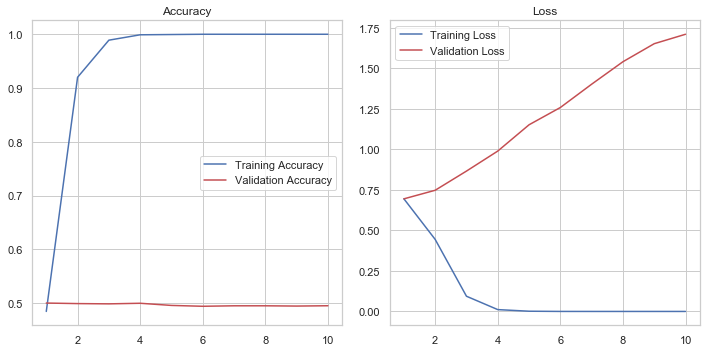

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, hist.history['acc'], 'b-', label='Training Accuracy')
plt.plot(epochs, hist.history['val_acc'], 'r-', label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hist.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, hist.history['val_loss'], 'r-', label='Validation Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

똑같은데...?

### Testing

In [13]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']: # negative, positive divide
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts) # train 시킨걸로 사용해야한다(바꿔야한다).
x_test = pad_sequences(sequences=sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [14]:
model.load_weights(filepath='pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 232us/step


[0.8974016856002808, 0.55216]